<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [67]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

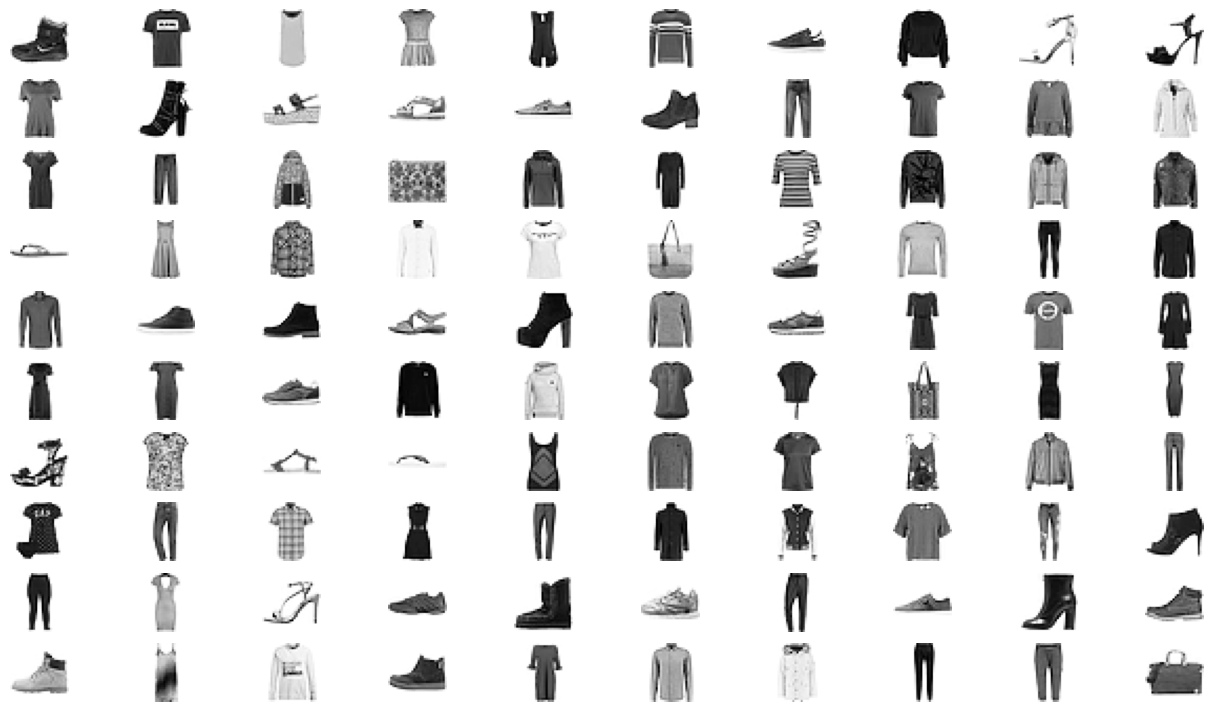

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

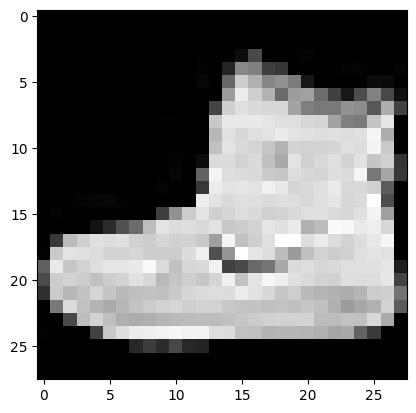

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='gray')
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [7]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [9]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
X_train_norm.shape[0]

60000

In [13]:
# Alumno: Imprimir la dimension de la imagen

X_train_norm[0].shape

(28, 28)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

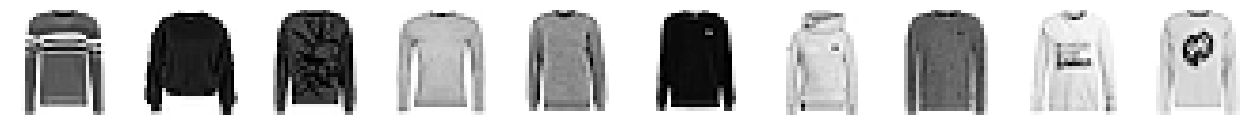

In [16]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))


contador = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)

    ax.axis('off')

    while True:
        if data_y_train[contador] == 2 :
            ax.imshow(X_train_norm[contador], cmap='Greys')
            contador += 1
            break
        contador += 1
plt.show()

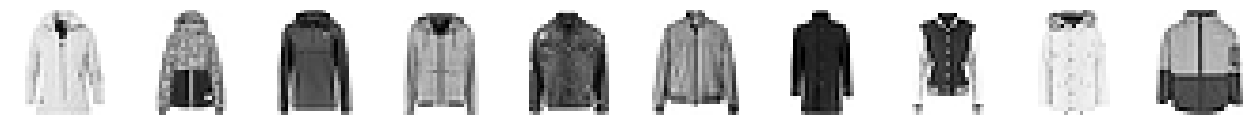

In [17]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))


contador = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)

    ax.axis('off')

    while True:
        if data_y_train[contador] == 4:
            ax.imshow(X_train_norm[contador], cmap='Greys')
            contador += 1
            break
        contador += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [21]:
X_train_norm.shape[1]


28

In [20]:
X_train_norm.shape[2]

28

In [18]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]
X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')


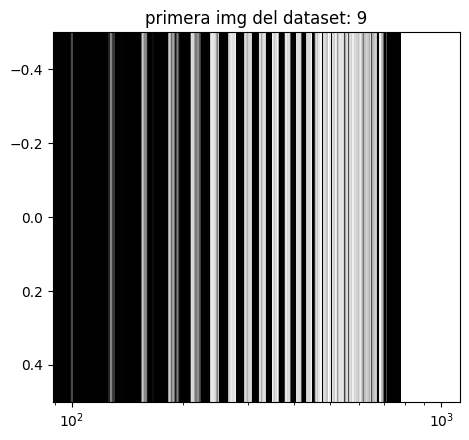

In [24]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()

ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')

# Escala de números en el eje de las x como potencia de base 10
ax.set_xscale("log")

plt.title("primera img del dataset: " + str(data_y_train[0]))

plt.show()

In [25]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [26]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [27]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [28]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [29]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [33]:
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=54, activation='relu'))
model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 54)                3510      
                                                                 
 dense_9 (Dense)             (None, 34)                1870      
                                                                 
 dense_10 (Dense)            (None, 24)                840       
                                                                 
 dense_11 (Dense)            (None, 10)                250       
                                                                 
Total params: 115,206
Trainable params: 115,206
Non-tr

In [36]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3449 - accuracy: 0.8856 - val_loss: 0.3617 - val_accuracy: 0.8789
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3427 - accuracy: 0.8846 - val_loss: 0.3618 - val_accuracy: 0.8762
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3328 - accuracy: 0.8883 - val_loss: 0.3423 - val_accuracy: 0.8813
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3243 - accuracy: 0.8900 - val_loss: 0.3368 - val_accuracy: 0.8882
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3196 - accuracy: 0.8923 - val_loss: 0.3428 - val_accuracy: 0.8855
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3110 - accuracy: 0.8957 - val_loss: 0.3356 - val_accuracy: 0.8892
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3038 - accuracy: 0.8964 - val_loss: 0.3457 - val_accuracy: 0.8873
Epoch 

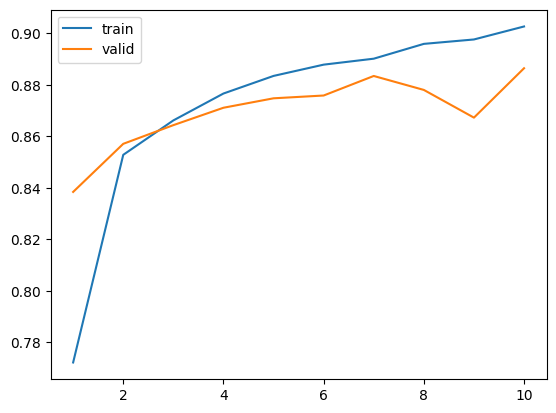

In [32]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [41]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=44, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=34, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 50)                3250      
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_45 (Dense)            (None, 44)                2244      
                                                                 
 dropout_24 (Dropout)        (None, 44)               

In [46]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3427 - accuracy: 0.8879 - val_loss: 0.3844 - val_accuracy: 0.8763
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3452 - accuracy: 0.8864 - val_loss: 0.3893 - val_accuracy: 0.8779
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3379 - accuracy: 0.8880 - val_loss: 0.3816 - val_accuracy: 0.8823
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3300 - accuracy: 0.8894 - val_loss: 0.3736 - val_accuracy: 0.8803
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3269 - accuracy: 0.8898 - val_loss: 0.3811 - val_accuracy: 0.8762
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3229 - accuracy: 0.8919 - val_loss: 0.3800 - val_accuracy: 0.8809
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3213 - accuracy: 0.8941 - val_loss: 0.3788 - val_accuracy: 0.8824
Epoch 

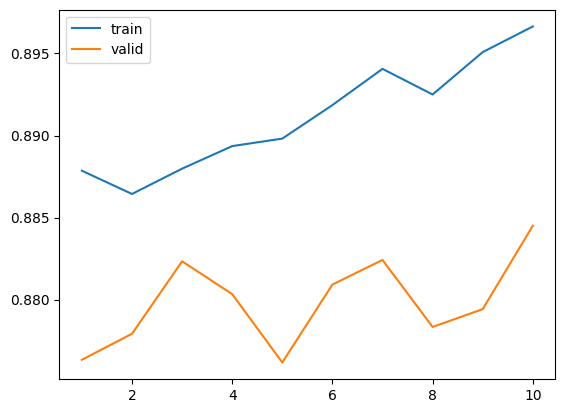

In [47]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [48]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [49]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [50]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8781


0.8780999779701233

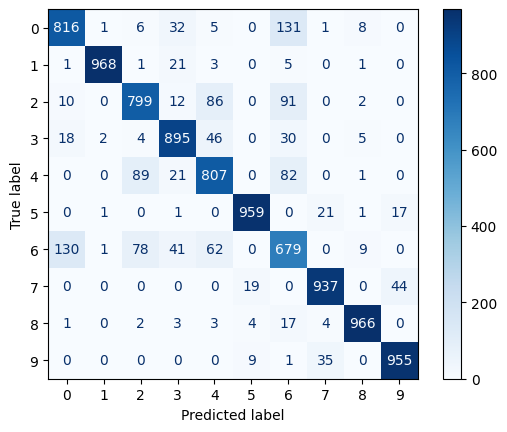

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [52]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [53]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_peores = X_test[rank_saco]

y_test_peores = y_test[rank_saco]

In [54]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 31ms/step - loss: 2.3319 - accuracy: 0.0000e+00


0.0

In [56]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob_peores = model.predict(X_test_peores)

y_hat_peores = np.argmax(y_hat_prob_peores,axis=1)
y_hat_peores

1/1 [==============================] - 0s 54ms/step


array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

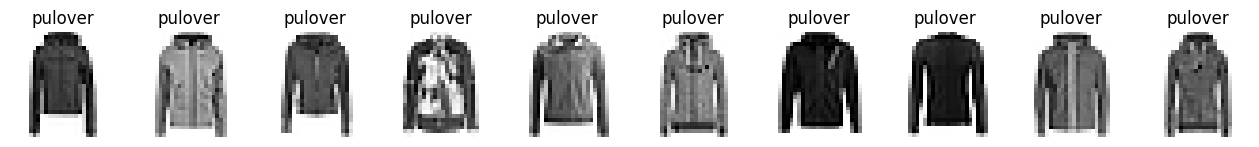

In [72]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
fig = plt.figure(figsize=(16,9))

# Contador
j = 0

for i in rank_saco:

    ax = fig.add_subplot(1, 10, j+1)

    ax.axis('off')
    
    for x in y_hat_peores:
      
      
      plt.title(str(category_list[x]))

    ax.imshow(X_test_norm[i], cmap='Greys')
    j += 1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)